In [35]:
import cv2
import os
import numpy as np
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from tqdm import tqdm
import matplotlib.pyplot as plt

In [36]:
# Convert and resize image 
def convert_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def resize_image(img, dim=(224, 224)):
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [37]:
print(os.getcwd())

/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/coil-100


In [38]:
# Directory path
dataset_dir = "/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/coil-100"
processed_dir = os.path.join(dataset_dir, "processed")
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# Iterate over files in the dataset directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"): # add other extensions if needed
        img_path = os.path.join(dataset_dir, filename)
        img = cv2.imread(img_path)
        
        # Convert to grayscale and resize
        gray_img = convert_to_grayscale(img)
        resized_img = resize_image(gray_img)
        
        output_path = os.path.join(processed_dir, filename)
        cv2.imwrite(output_path, resized_img)

In [39]:
img_gray_path= "/Users/thienphuong/Desktop/DATA-4381-Capstone-Project/coil-100/processed/obj1__0.png"
img_gray = cv2.imread(img_gray_path, cv2.IMREAD_GRAYSCALE)
img_gray.shape

(224, 224)

In [40]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

In [41]:
# Load processed images
images = []
for filename in os.listdir(processed_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        img_path = os.path.join(processed_dir, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # directly read as grayscale
        images.append(img)

In [42]:
# Convert image list to numpy array and flatten
images_np = np.array(images).reshape(len(images), -1)

# Compute pairwise distances
dist_matrix = pairwise_distances(images_np)

In [43]:
images_array = np.array(images)
# Compute pairwise distance matrix by reshaping each image to a 1D array
dist_matrix = pairwise_distances(images_array.reshape(len(images_array), -1), metric='euclidean')

In [44]:
# Apply MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embeddings = mds.fit_transform(dist_matrix)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [18]:
#labels = [filename.split('.')[0] for filename in os.listdir(processed_dir) if filename.endswith(".png") or filename.endswith(".jpg")]

In [19]:
#unique_labels = list(set(labels))
#int_labels = [unique_labels.index(label) for label in labels]

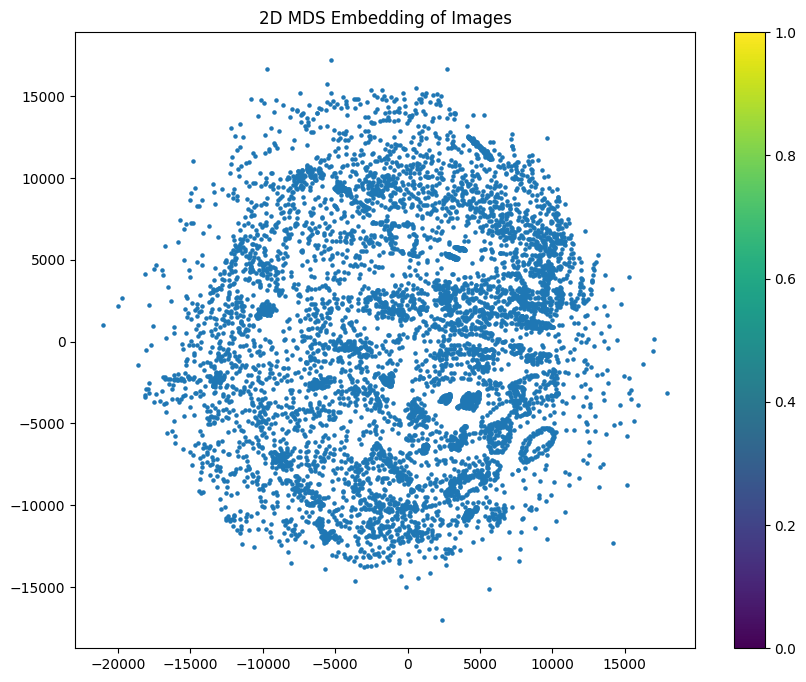

In [47]:
plt.figure(figsize=(10, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5)
#plt.colorbar()
plt.title('2D MDS Embedding of Images')
plt.show()

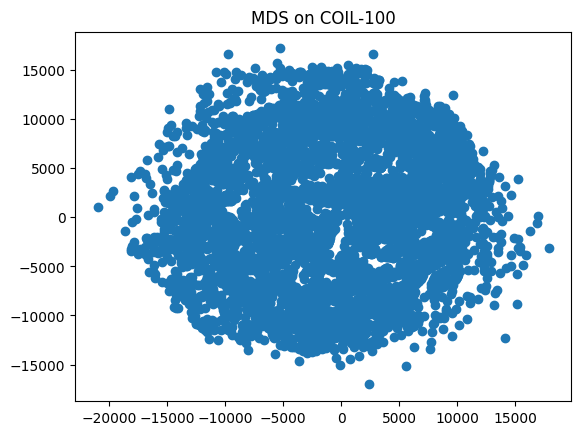

In [48]:
plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.title("MDS on COIL-100")
#plt.xlabel("MDS1")
#plt.ylabel("MDS2")
plt.show()

In [49]:
images_array = np.array(images)
images_reshaped = images_array.reshape(len(images_array), -1)

eps_values = [1e-3, 1e-6, 1e-9] 
embeddings = {}

# Loop over eps values and compute MDS embeddings
for eps in eps_values:
    embedding = MDS(n_components=2, metric=True, eps=eps)  # metric is set to True for metric MDS
    images_transformed = embedding.fit_transform(images_reshaped)
    embeddings[eps] = images_transformed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


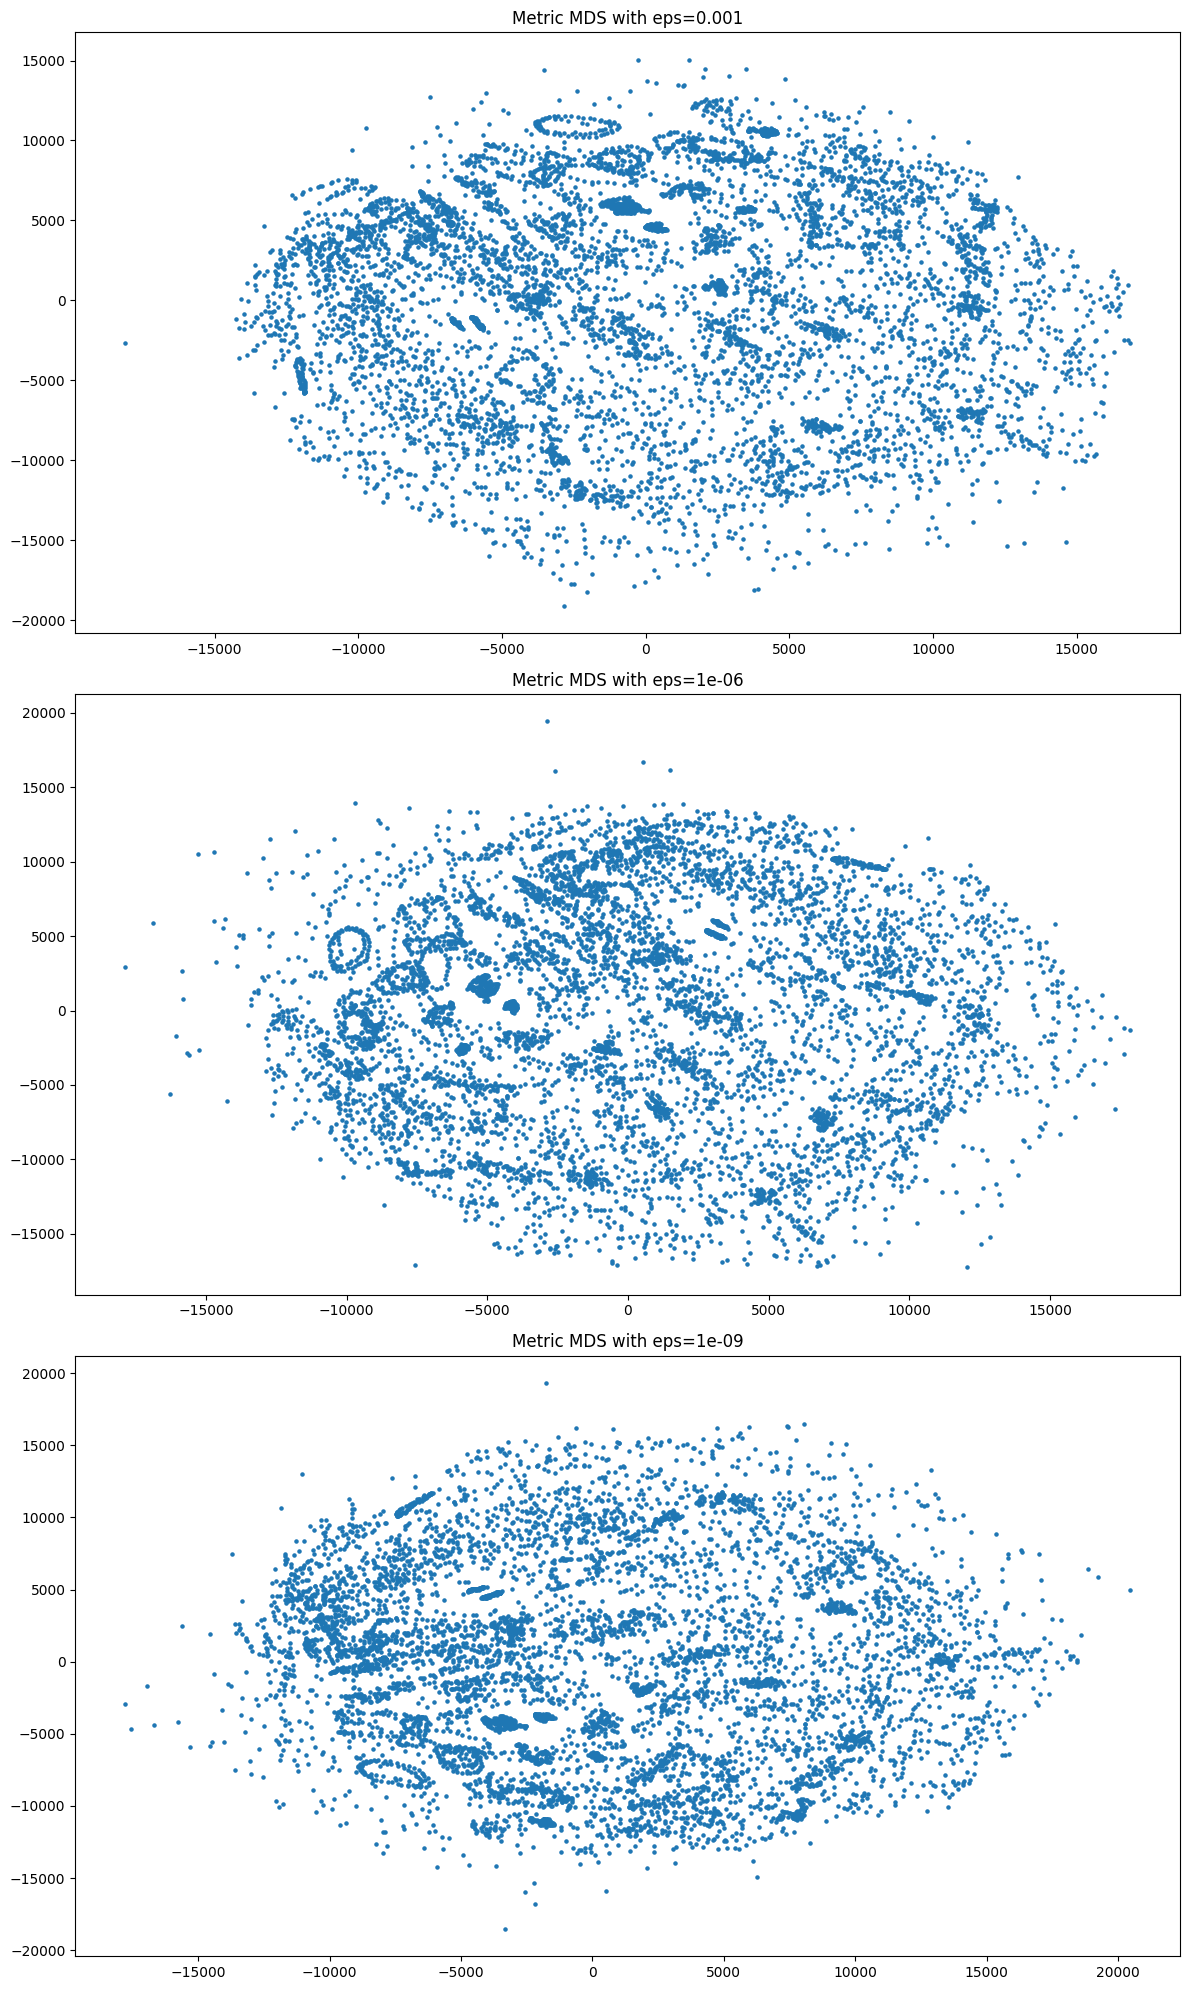

In [51]:
fig, axes = plt.subplots(nrows=len(eps_values), figsize=(12, 20))

for j, eps in enumerate(eps_values):
    data = embeddings[eps]
    ax = axes[j]
    sc = ax.scatter(data[:, 0], data[:, 1], s=5)
    ax.set_title(f'Metric MDS with eps={eps}')

plt.tight_layout()
#plt.colorbar(sc, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.1)
plt.show()

In [52]:
from sklearn.manifold import Isomap

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 13 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

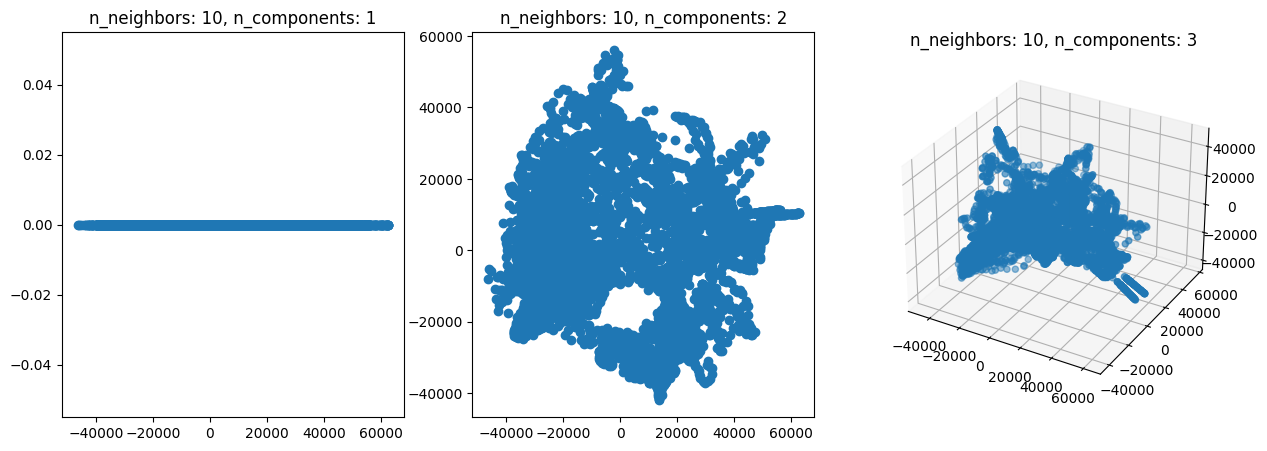

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the

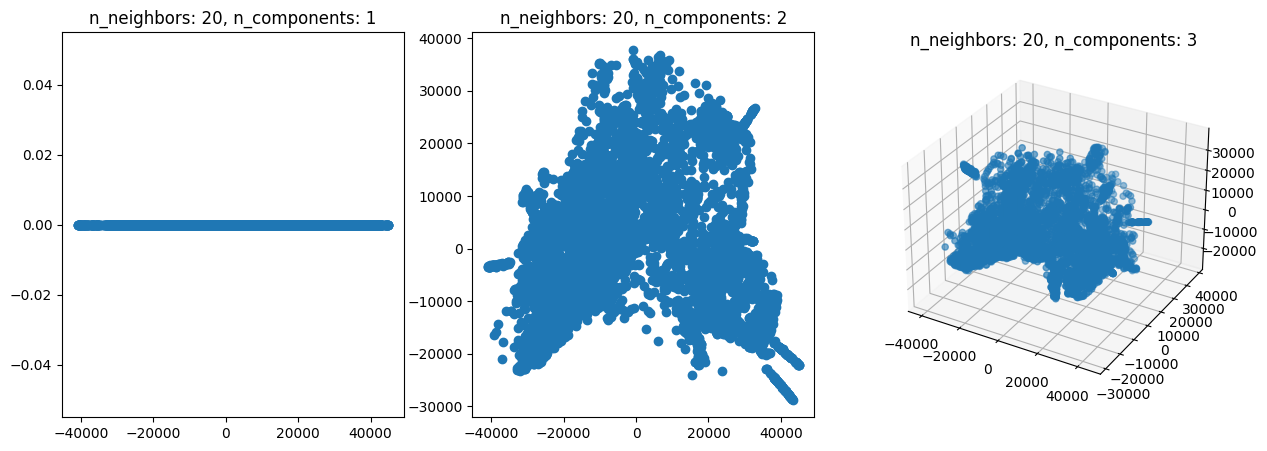

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sp

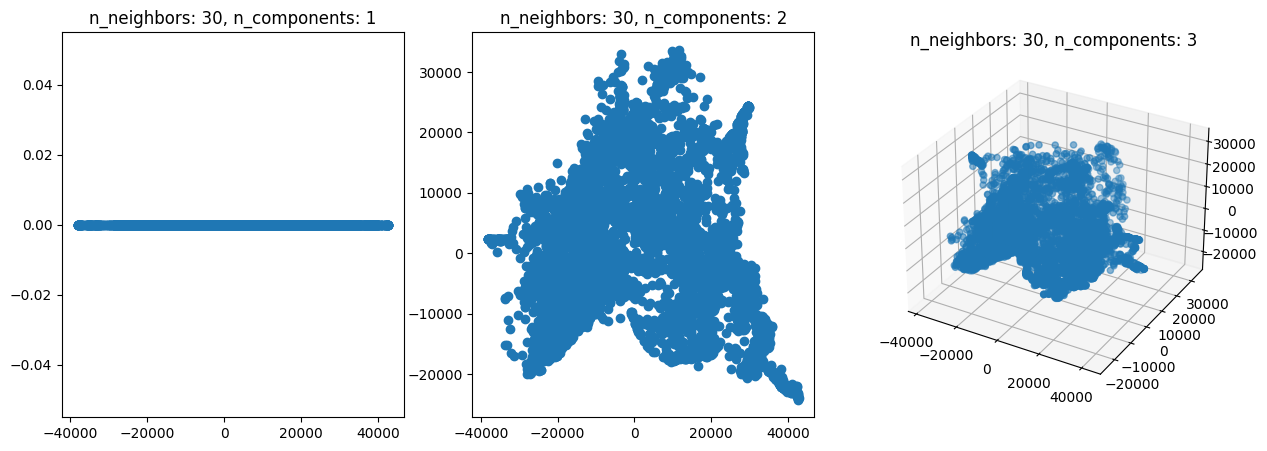

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sp

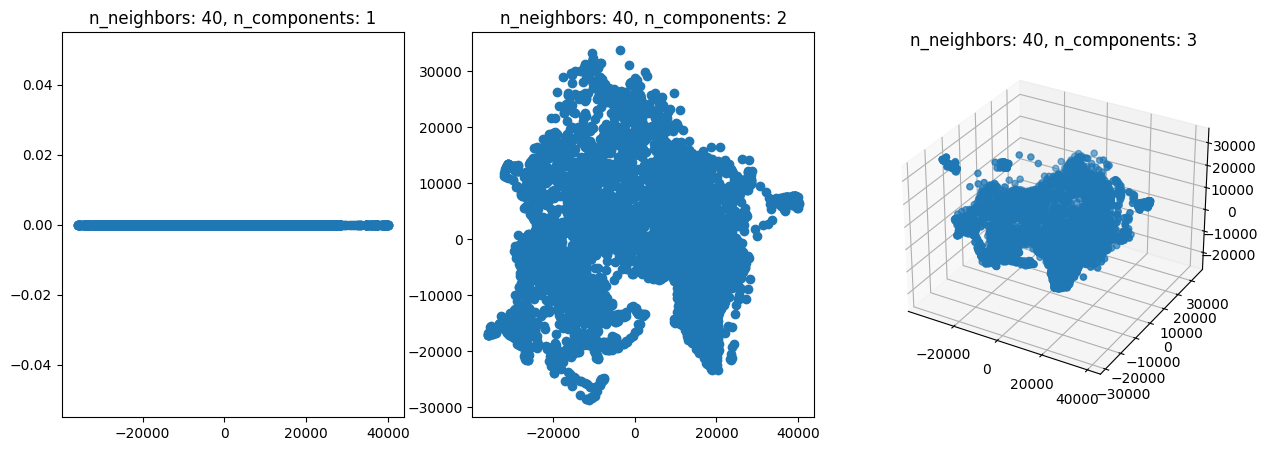

In [53]:
n_neighbors_values = [10, 20, 30, 40]
n_components_values = [1, 2, 3]

transformed_isomap_data_list = []

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        
        # Isomap
        isomap = Isomap(n_neighbors=n_neighbors_val, n_components=n_components_val)
        transformed_isomap_data = isomap.fit_transform(images_reshaped)
        transformed_isomap_data_list.append((n_neighbors_val, n_components_val, transformed_isomap_data))
        
        if n_components_val == 1:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_isomap_data, np.zeros_like(transformed_isomap_data))
        elif n_components_val == 2:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1])
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')  # 3D subplot
            ax.scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], transformed_isomap_data[:, 2])
        
        plt.title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
        
    plt.show()